In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [ ]:
X_train, X_test, Y_train, Y_test = np.load(
    '/content/datasets/tbt_data_max_13_size_20320.npy',
    allow_pickle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(81468, 13)
(9052, 13)
(81468, 10)
(9052, 10)


In [ ]:
model = Sequential()
model.add(Embedding(20320, 300, input_length=13)) #총 학습 데이터 수, max의 길이
model.add(Conv1D(512, kernel_size=3, 
            padding='same', activation='relu'))
model.add(MaxPool1D(pool_size=1))
model.add(LSTM(128, activation='tanh',
               return_sequences=True))
#model.add(Dropout(0.3))
model.add(LSTM(64, activation='tanh',
               return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, activation='tanh'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 13, 300)           6096000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 13, 512)           461312    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 13, 512)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 13, 128)           328192    
_________________________________________________________________
lstm_7 (LSTM)                (None, 13, 64)            49408     
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 64)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)               

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
fit_hist = model.fit(X_train, Y_train, batch_size=100,
        epochs=8, validation_data=(X_test, Y_test))

Epoch 1/8
815/815 [==============================] - 66s 75ms/step - loss: 0.7195 - accuracy: 0.7659 - val_loss: 0.3685 - val_accuracy: 0.8885
Epoch 2/8
815/815 [==============================] - 61s 74ms/step - loss: 0.2850 - accuracy: 0.9194 - val_loss: 0.3496 - val_accuracy: 0.9010
Epoch 3/8
815/815 [==============================] - 61s 75ms/step - loss: 0.2002 - accuracy: 0.9419 - val_loss: 0.3499 - val_accuracy: 0.8971
Epoch 4/8
815/815 [==============================] - 61s 74ms/step - loss: 0.1580 - accuracy: 0.9532 - val_loss: 0.3654 - val_accuracy: 0.8964
Epoch 5/8
815/815 [==============================] - 61s 75ms/step - loss: 0.1298 - accuracy: 0.9605 - val_loss: 0.3747 - val_accuracy: 0.9047
Epoch 6/8
815/815 [==============================] - 61s 75ms/step - loss: 0.1094 - accuracy: 0.9669 - val_loss: 0.4046 - val_accuracy: 0.9022
Epoch 7/8
815/815 [==============================] - 61s 74ms/step - loss: 0.0965 - accuracy: 0.9703 - val_loss: 0.4403 - val_accuracy: 0.8984

In [ ]:
score = model.evaluate(X_test, Y_test)
print(score[1])

283/283 [==============================] - 1s 5ms/step - loss: 0.4386 - accuracy: 0.9010
0.901016354560852


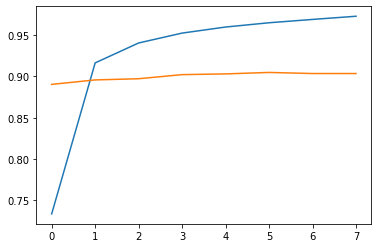

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

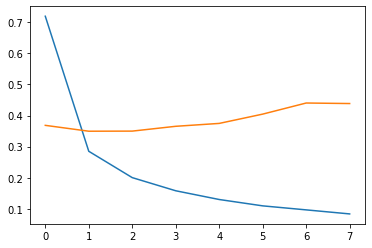

In [ ]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

In [ ]:
model.save('/content/models/tbt_classfication_{}.h5'.format(score[1]))